Mean Squared Error: 1754318687330.637
R-squared: 0.6529242642153237


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


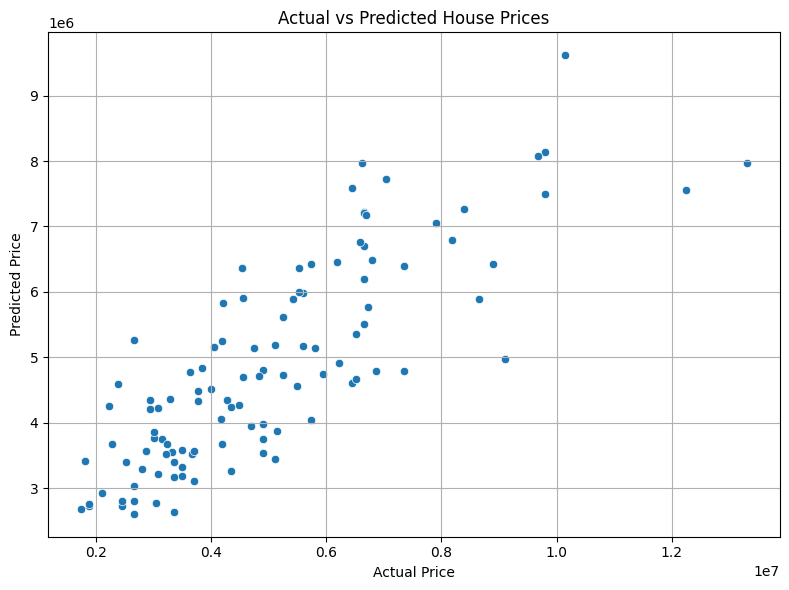

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarnin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import shap

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Load dataset
df = pd.read_csv("/Users/devanshjavia/Desktop/Proj/Predicting House Prices with Linear Regression/Housing.csv.xls")

# ✅ Use your actual feature names from the model
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# ✅ Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')  # numerical features go untouched

# ✅ Full pipeline
model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# ✅ Split data
X = df[categorical_features + numerical_features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train model
model_pipeline.fit(X_train, y_train)

# ✅ Predictions and evaluation
y_pred = model_pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# ✅ Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Save model
os.makedirs('model', exist_ok=True)
joblib.dump(model_pipeline, 'model/model.pkl')

# ✅ SHAP Integration
# Extract preprocessor and regressor
preprocessor = model_pipeline.named_steps['preprocess']
regressor = model_pipeline.named_steps['regressor']

# Transform X_train for SHAP
X_train_transformed = preprocessor.transform(X_train)

# ✅ Get feature names (categorical + numerical)
encoded_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(encoded_feature_names) + numerical_features

# ✅ Convert to DataFrame for SHAP
X_transformed_df = pd.DataFrame(X_train_transformed, columns=all_feature_names)

# ✅ Create SHAP explainer
explainer = shap.Explainer(regressor.predict, X_transformed_df)

# ✅ Compute SHAP values
shap_values = explainer(X_transformed_df)

# ✅ SHAP Summary Plot
shap.plots.beeswarm(shap_values, max_display=15, show=False)
plt.tight_layout()

# ✅ Save plot to static folder
os.makedirs("static/images", exist_ok=True)
plt.savefig("static/images/shap_summary.png")
plt.close()
